<a href="https://colab.research.google.com/github/N1a2t3a/.Data_Science/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
tables = pd.read_html(url)

df = tables[0]
print(df.head())

print(df.shape)

df.replace('—', pd.NA, inplace=True)

print(df.dtypes)

                                   Населення України  \
0  Статево-вікова піраміда населення України на 1...   
1                                        Чисельність   
2                                            Густота   
3                                Коефіцієнт міграції   
4                                      Природний рух   

                                 Населення України.1  
0  Статево-вікова піраміда населення України на 1...  
1                   ▼ 40,96 млн (1 лютого 2022) осіб  
2                                   ▼ 68,2 особи/км²  
3                                             ▲0,9 ‰  
4                                      Природний рух  
(29, 2)
Населення України      object
Населення України.1    object
dtype: object


In [ ]:
non_numeric_columns = df.columns[df.dtypes == 'object']
for column in non_numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
missing_values = df.isnull().sum() / len(df)
print(missing_values)

Населення України      1.0
Населення України.1    1.0
dtype: float64


In [ ]:
df = df.drop([0, len(df) - 1])

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
data = {
    "Регіон": ["Крим", "Вінницька", "Волинська", "Дніпропетровська", "Донецька", "Житомирська", "Закарпатська", "Запорізька", "Івано-Франківська", "Київська", "Кіровоградська", "Луганська", "Львівська", "Миколаївська", "Одеська", "Полтавська", "Рівненська", "Сумська", "Тернопільська", "Харківська", "Херсонська", "Хмельницька", "Черкаська", "Чернівецька", "Чернігівська", "Київ", "Севастополь", "Україна"],
    "2019": [None, 7.6, 10.1, 7.1, None, 7.9, 10.4, 6.8, 8.8, 8.0, 6.8, None, 8.7, 7.1, 8.8, 6.5, 10.7, 6.0, 7.6, 6.8, 8.1, 7.9, 6.4, 9.2, 6.1, 11.0, None, 8.1]
}

ukraine_mean_2019 = round(sum(filter(None, data["2019"])) / len(list(filter(None, data["2019"]))), 2)

regions_higher_than_mean_2019 = [data["Регіон"][i] for i, val in enumerate(data["2019"]) if val is not None and val > ukraine_mean_2019]

print("Середнє значення народжуваності по Україні у 2019 році:", ukraine_mean_2019)
print("Регіони з вищим рівнем народжуваності за середнім по Україні у 2019 році:", regions_higher_than_mean_2019)


Середнє значення народжуваності по Україні у 2019 році: 8.02
Регіони з вищим рівнем народжуваності за середнім по Україні у 2019 році: ['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Україна']


In [ ]:
data = {
    "Регіон": ["Крим", "Вінницька", "Волинська", "Дніпропетровська", "Донецька", "Житомирська", "Закарпатська", "Запорізька", "Івано-Франківська", "Київська", "Кіровоградська", "Луганська", "Львівська", "Миколаївська", "Одеська", "Полтавська", "Рівненська", "Сумська", "Тернопільська", "Харківська", "Херсонська", "Хмельницька", "Черкаська", "Чернівецька", "Чернігівська", "Київ", "Севастополь", "Україна"],
    "2014": ["—", 10.9, 14.1, 11.1, 8.2, 12.0, 14.6, 10.6, 12.2, 12.1, 10.8, 5.1, 11.9, 11.2, 12.3, 10.0, 14.8, 9.2, 10.9, 10.1, 11.5, 11.2, 9.8, 12.9, 9.0, 12.1, "—", 11.1]
}

data["2014"] = [None if x == "—" else x for x in data["2014"]]

max_value_index = data["2014"].index(max(filter(lambda x: x is not None, data["2014"])))

region_with_highest_birth_rate = data["Регіон"][max_value_index]

print("Регіон з найвищою народжуваністю у 2014 році:", region_with_highest_birth_rate)


Регіон з найвищою народжуваністю у 2014 році: Рівненська


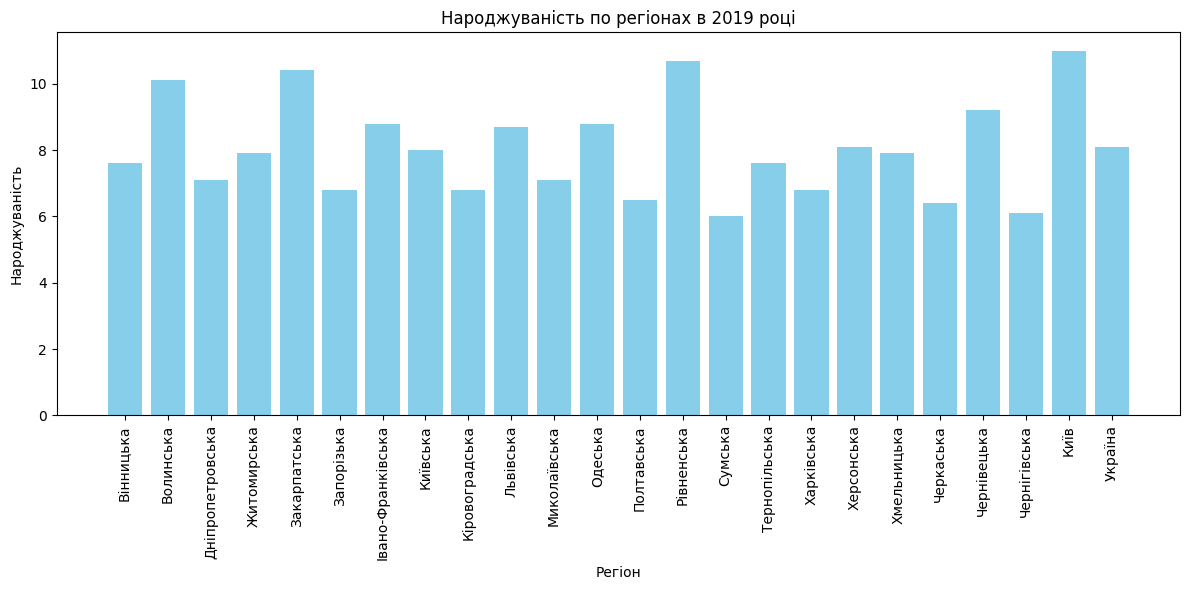

In [ ]:
data = {
    "Регіон": ["Крим", "Вінницька", "Волинська", "Дніпропетровська", "Донецька", "Житомирська", "Закарпатська", "Запорізька", "Івано-Франківська", "Київська", "Кіровоградська", "Луганська", "Львівська", "Миколаївська", "Одеська", "Полтавська", "Рівненська", "Сумська", "Тернопільська", "Харківська", "Херсонська", "Хмельницька", "Черкаська", "Чернівецька", "Чернігівська", "Київ", "Севастополь", "Україна"],
    "2019": [None, 7.6, 10.1, 7.1, None, 7.9, 10.4, 6.8, 8.8, 8.0, 6.8, None, 8.7, 7.1, 8.8, 6.5, 10.7, 6.0, 7.6, 6.8, 8.1, 7.9, 6.4, 9.2, 6.1, 11.0, None, 8.1]
}

data_without_none = {key: value for key, value in zip(data["Регіон"], data["2019"]) if value is not None}

plt.figure(figsize=(12, 6))
plt.bar(data_without_none.keys(), data_without_none.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.tight_layout()
plt.show()


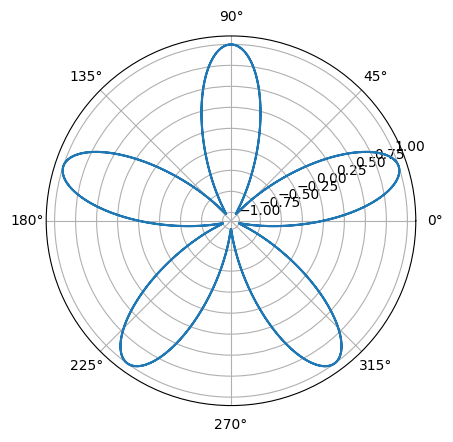

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

theta = np.linspace(0, 4.0 * np.pi, 500)

r = np.sin(5 * theta)
plt.polar(theta, r)
plt.show()

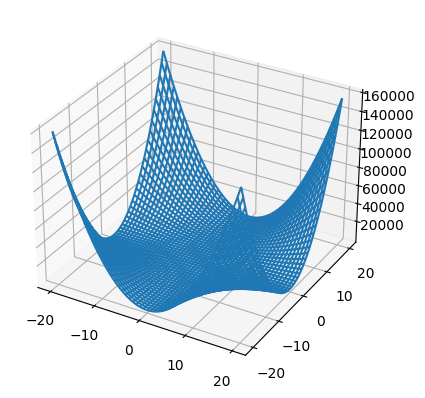

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
%matplotlib inline


fig = plt.figure()
ax = fig.add_subplot(projection="3d")

grid = np.arange(-20, 20, 0.10)
x, y = np.meshgrid(grid, grid)
z = x ** 2 * y ** 2 + 2

ax.plot_wireframe(x, y, z)

plt.show()

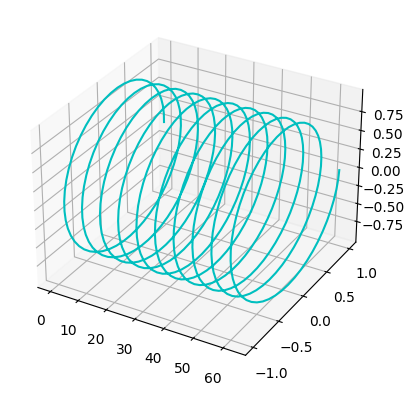

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

theta_max = 20 * np.pi
n = 500
theta = np.linspace(0, theta_max, n)
x = theta
z = np.sin(theta)
y = np.cos(theta)
ax.plot(x, y, z, "c")

plt.show()

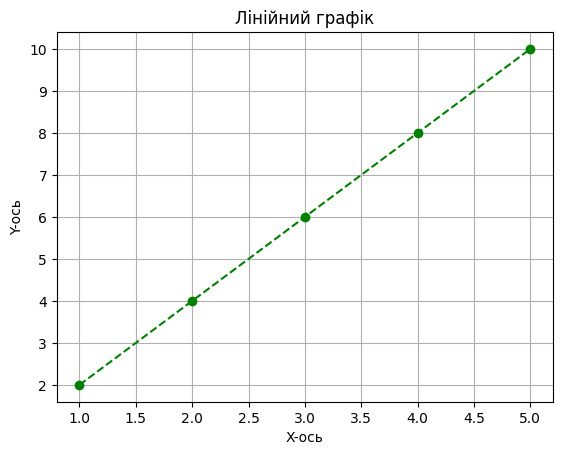

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y, marker='o', linestyle='--', color='green')
plt.xlabel('X-ось')
plt.ylabel('Y-ось')
plt.title('Лінійний графік')
plt.grid(True)
plt.show()